In [86]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from pprint import pprint
from pandas.io.json import json_normalize
import csv

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [87]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list and note the latitude
    if city not in cities:
        cities.append(city)
        

# Print the city count to confirm sufficient count
len(cities)



614

In [88]:
print(cities)

['nizhneyansk', 'cabo san lucas', 'rikitea', 'puerto ayora', 'noumea', 'piacabucu', 'asau', 'mataura', 'thompson', 'upernavik', 'albany', 'faanui', 'ciudad bolivar', 'barentsburg', 'yuancheng', 'karratha', 'esperance', 'quipapa', 'jamestown', 'poum', 'busselton', 'mackay', 'aklavik', 'viedma', 'barrow', 'quatre cocos', 'vaitupu', 'mys shmidta', 'dalbandin', 'butaritari', 'bredasdorp', 'lavrentiya', 'los llanos de aridane', 'flinders', 'lasa', 'mahebourg', 'oparino', 'alotau', 'lompoc', 'yellowknife', 'san cristobal', 'ilulissat', 'hilo', 'tasiilaq', 'khash', 'pevek', 'yarada', 'cap malheureux', 'dianopolis', 'hermanus', 'samusu', 'punta arenas', 'dikson', 'terrak', 'saint george', 'qaanaaq', 'tazovskiy', 'ushuaia', 'udachnyy', 'blind river', 'atuona', 'huangzhou', 'belushya guba', 'perisor', 'tuktoyaktuk', 'taolanaro', 'bonfim', 'torbay', 'bluff', 'qaqortoq', 'caravelas', 'capao da canoa', 'abbeville', 'portland', 'port alfred', 'saskylakh', 'grand river south east', 'kalbay', 'hithadh

In [89]:
#get the temperatures for all cities


# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"    
    
    

city_data = []

# For each city, we access its information through its API
for city in cities:
    # Build query URL
    query_url = f'{url}appid={weather_api_key}&q={city}&units=imperial'
    
    weather_response =requests.get(query_url)
    weather_json = weather_response.json()
    try:
        city_data.append([weather_json['name'],weather_json['coord']['lat'], weather_json['main']['temp'], weather_json['main']['humidity'],
                             weather_json['clouds']['all'], weather_json['wind']['speed']])
    except:
        city_data.append([0])
                         
city_df = pd.DataFrame(city_data)
city_df.columns=['City', "lat", 'city_temps', 'perc_humidity', 'perc_cloudiness', "wind_speed"]
city_df.to_csv("cities.csv", index=False)
    

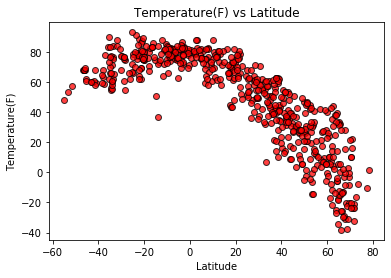

<Figure size 432x288 with 0 Axes>

In [90]:
# build a scatter plot of Temperature(F) vs Latitude
x_values = city_df['lat']
y_vaules = city_df['city_temps']
plt.scatter(x_values, y_vaules, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Temperature(F)")
plt.title("Temperature(F) vs Latitude")
plt.show()
plt.savefig('TempvLat.png')

In [91]:
# The temperature vs latitude plot shows that in the northern hemispheres,as the distance from the equator increases, 
#the cities have colder temperatures.
#In the southern hemisphere, as distance from the equator increases, the cities generally have warmer temperatures.

SyntaxError: invalid syntax (<ipython-input-91-f61cffb9f101>, line 3)

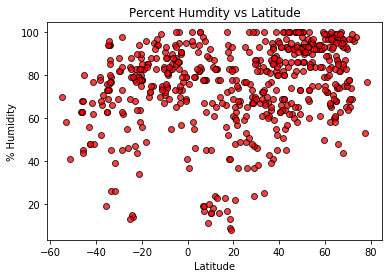

<Figure size 432x288 with 0 Axes>

In [92]:
# build a scatter plot of % humidity vs Latitude
x_values = city_df['lat']
y_vaules = city_df['perc_humidity']
plt.scatter(x_values, y_vaules, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("% Humidity")
plt.title("Percent Humdity vs Latitude")
plt.show()
plt.savefig('HumidityvLat.png')

In [ ]:
#In the northern hemisphere, the % humidity generally increases as latitude increases.
#In the southern hemisphere, the % humidity generally increases as distance from the equator increases.

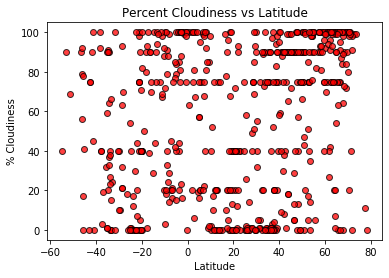

<Figure size 432x288 with 0 Axes>

In [93]:
# build a scatter plot of % cloudiness vs Latitude
x_values = city_df['lat']
y_vaules = city_df['perc_cloudiness']
plt.scatter(x_values, y_vaules, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("% Cloudiness")
plt.title("Percent Cloudiness vs Latitude")
plt.show()
plt.savefig('CloudsvLat.png')

In [ ]:
#There is no clear pattern between the latitude of a city and the percent cloudiness.

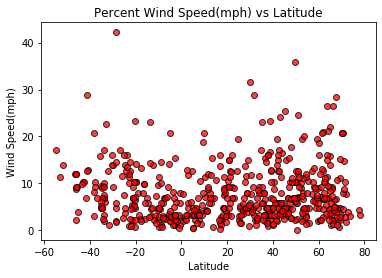

<Figure size 432x288 with 0 Axes>

In [94]:
# build a scatter plot of Wind Speed vs Latitude
x_values = city_df['lat']
y_vaules = city_df['wind_speed']
plt.scatter(x_values, y_vaules, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title("Percent Wind Speed(mph) vs Latitude")
plt.show()
plt.savefig('WindvLat.png')

In [ ]:
#Most cities experience wind speeds below 20 mph regardless of latitude.

In [95]:
#create a column for northern and southern hemisphere
bins = [-101, 0, 100]
labels = ['Southern Hemisphere', 'Northern Hemisphere']

#categorize the latitudes by bins
pd.cut(city_df['lat'], bins, labels=labels).head()

# Place the data series into a new column inside of the DataFrame
city_df["Hemisphere"] = pd.cut(city_df["lat"], bins, labels=labels)


#create a table with southern or northern hemisphere
hemispheres = city_df.groupby('Hemisphere').head()
hemispheres.reset_index(level =0, inplace = True)

# isolate northern hemisphere data
northern =hemispheres[hemispheres['Hemisphere'] == "Northern Hemisphere"]
southern =hemispheres[hemispheres['Hemisphere']=="Southern Hemisphere"]



The r-squared is: -0.9936061980782995


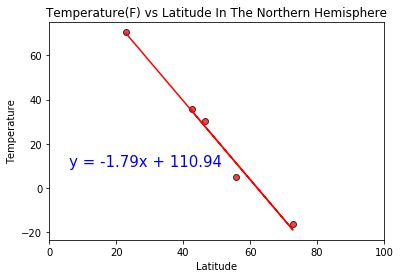

In [110]:
# Northern hemisphere Temperature (F) vs. Latitude

# Add the linear regression equation and line to plot
x_values = northern['lat']
y_values = northern['city_temps']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlim(0,100)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
print(f"The r-squared is: {rvalue}")
plt.title("Temperature(F) vs Latitude In The Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Temperature")   
plt.show()


In [ ]:
# With a r-squared value of almost -1, there is a negative correlation between temperature and 
#latitude in the northern hemisphere. This means the temperature of cities increase when they are located closer to
#the equator, and are colder when they are farther from the equator.

The r-squared is: 0.5205175734559839


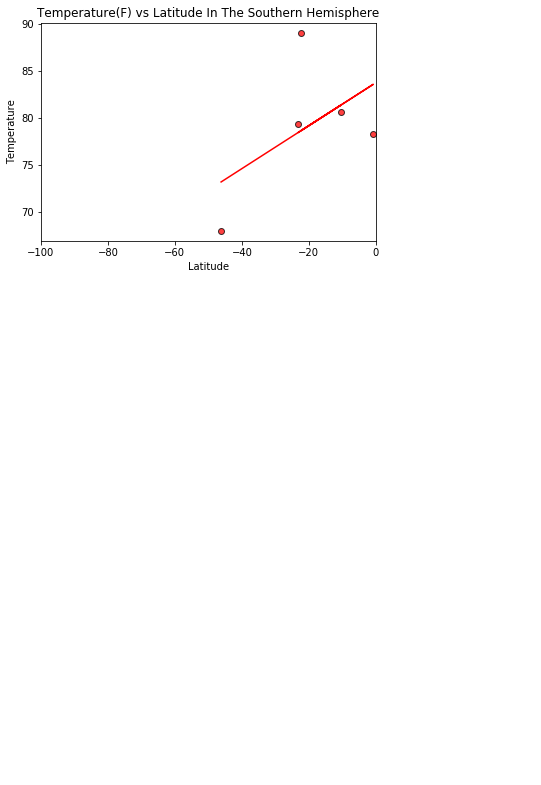

In [109]:
#Southern Hemisphere - Temperature (F) vs. Latitude
# Add the linear regression equation and line to plot
x_values = southern['lat']
y_values = southern['city_temps']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlim(-100,0)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
print(f"The r-squared is: {rvalue}")
plt.title("Temperature(F) vs Latitude In The Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Temperature")   
plt.show()


In [ ]:
# The r-squared value suggests that when cities are closer to the equator, their temperatures are warmer. When they are
# farther from the equator, they are colder.

The r-squared is: 0.869381781794271


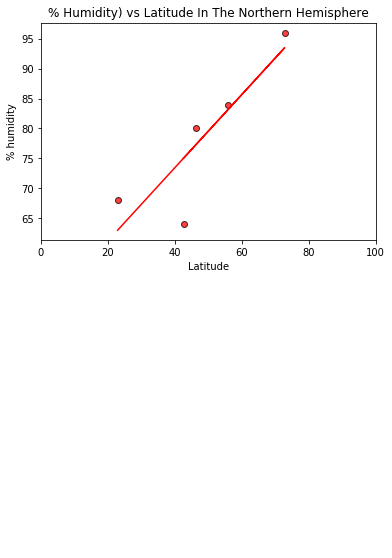

In [111]:
# Northern hemisphere Humidity (%) vs. Latitude

# build a scatter plot of % humidity vs Latitude
x_values = northern['lat']
y_values = northern['perc_humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlim(0, 100)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
print(f"The r-squared is: {rvalue}")
plt.title("% Humidity) vs Latitude In The Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("% humidity")   
plt.show()


In [ ]:
# The r-squared value is close to 1, which suggests that humidity increases when the studied city is closer to the equator.
# Cities farther from the equator have lower humidity.

The r-squared is: 0.3091452691640565


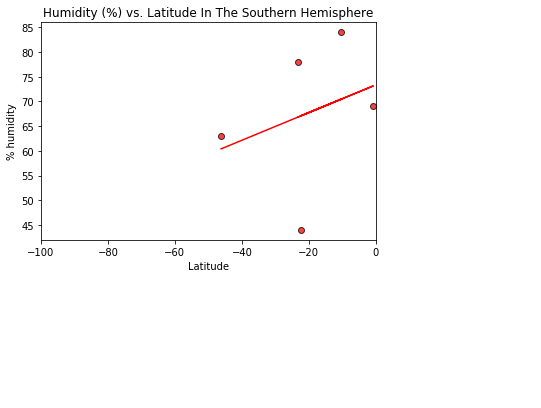

In [108]:
#Southern Hemisphere - Humidity (%) vs. Latitude

# build a scatter plot of % humidity vs Latitude
x_values = southern['lat']
y_values = southern['perc_humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlim(-100,0)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
print(f"The r-squared is: {rvalue}")
plt.title("Humidity (%) vs. Latitude In The Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("% humidity")   
plt.show()



In [ ]:
# The r-squared value is only slightly above 0, suggesting there is a weak correlation between proximity to the equator and
# higher humidity. The regression line doesn't fit any data points directly, meaning additional analyzation is needed to
# draw more certain conclusions. 

The r-squared is: 0.31584254447802096


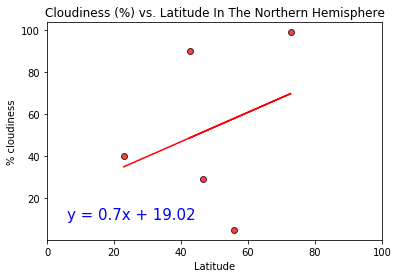

In [107]:
 #Northern Hemisphere - Cloudiness (%) vs. Latitude
    
    # build a scatter plot of % cloudiness vs Latitude
x_values = northern['lat']
y_values = northern['perc_cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlim(0, 100)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
print(f"The r-squared is: {rvalue}")
plt.title("Cloudiness (%) vs. Latitude In The Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("% cloudiness")   
plt.show()


In [ ]:
# The r-squared value is only slightly above 0, suggesting there is a weak correlation between proximity to the equator and
# percent cloudiness. The regression line isn't over any data points, meaning additional analyzation is needed to
# draw more certain conclusions. 

The r-squared is: 0.1174665554318344


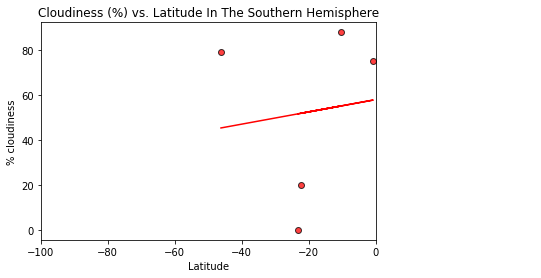

In [106]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude

# build a scatter plot of % cloudiness vs Latitude
x_values = southern['lat']
y_values = southern['perc_cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlim(-100,0)
plt.plot(x_values,regress_values,"r-")
print(f"The r-squared is: {rvalue}")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
plt.title("Cloudiness (%) vs. Latitude In The Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("% cloudiness")   
plt.show()


In [ ]:
# The r-squared value is only slightly above 0, suggesting there is no correlation between proximity to the equator and
# percent cloudiness. The regression line doesn't fit any data points directly, meaning additional analyzation is needed to
# draw more certain conclusions. 

The r-squared is: -0.9158879213940887


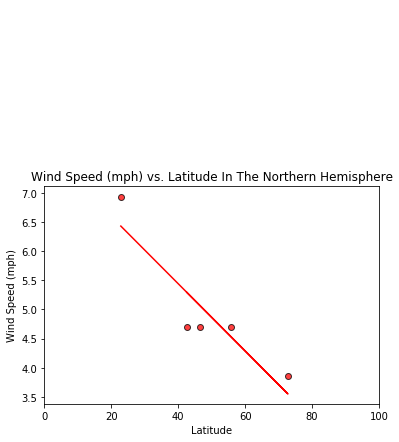

In [105]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude
x_values = northern['lat']
y_values = northern['wind_speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlim(0, 100)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
print(f"The r-squared is: {rvalue}")
plt.title("Wind Speed (mph) vs. Latitude In The Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")   
plt.show()


In [ ]:
# In the northern hemisphere, wind speeds in a specific city decrease as distance from the equator increases. 
# The r-squared value is -0.91, supporting a strong correlation.

The r-squared is: -0.7828875209311532


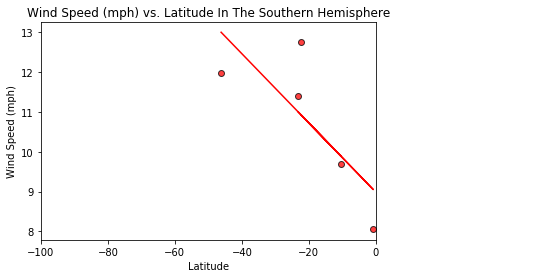

In [104]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude
x_values = southern['lat']
y_values = southern['wind_speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlim(-100,0)
plt.plot(x_values,regress_values,"r-")
print(f"The r-squared is: {rvalue}")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
plt.title("Wind Speed (mph) vs. Latitude In The Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")   
plt.show()


In [ ]:
# In the southern hemisphere, wind speeds in a specific city decrease as distance from the equator increases. 
# The r-squared value is -0.78, supporting this correlation.